In [421]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # создает многослойную нс
from tensorflow.keras.layers import Dense # полносвязный слой нс
import tensorflow.keras.optimizers as opts
from tensorflow import keras

import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [422]:
EPOCHS = 200

In [423]:
a, b = 2, 3
def f(x):
    return math.log(x)-x+1.8

301
[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27
 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41
 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55
 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69
 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83
 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97
 1.98 1.99 2.   2.01 2.02 2.03 2.04 2.05 2.06 2.07 2.08 2.09 2.1  2.11
 2.12 2.13 2.14 2.15 2.16 2.17 2.18 2.19 2.2  2.21 2.22 2.23 2.24 2.25
 2.26 2.27 2.28 2.29 2.3  2.31 2.32 2.33 2.34 2.35 2.36 2.37 2.38 2.39
 2.4  2.41 2.42 2.43 2.44 2.45 2.46 2.47 2.48 2.49 2.5  2.51 2.52 2.53
 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63 2.64 2.65 2.66 2.67
 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76 2.77 2.78 2.79 2.8  2.81
 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9  2.91 2.92 2.93 2.94 2.95
 2

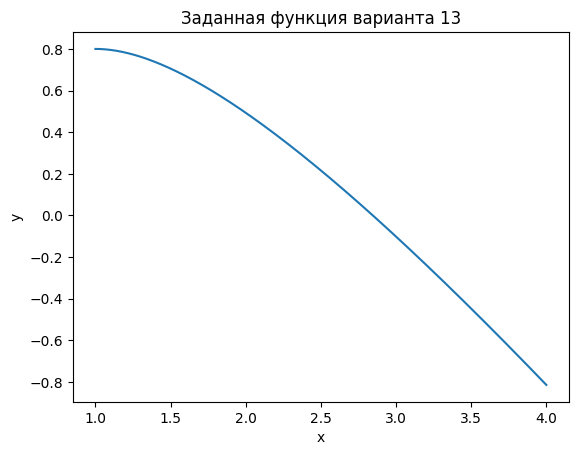

In [424]:
x = np.arange(a - 1, b + 1.01, 0.01)
print(len(x))
print(x)
y = np.array([f(xx) for xx in x])
   
plt.plot(x, y)
  
plt.xlabel('x')
plt.ylabel('y')

plt.title('Заданная функция варианта 13')

plt.show()

In [425]:
train_step = 0.01
x_train = np.arange(train_step, b + 3 + train_step, train_step)
print(f'x_train: {x_train} with len = {len(x_train)}')
y_train = np.array([f(xx) for xx in x_train])
print(f'y_train: {y_train} with len = {len(y_train)}')

x_train: [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12
 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26
 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4
 1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54
 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68
 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82
 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96

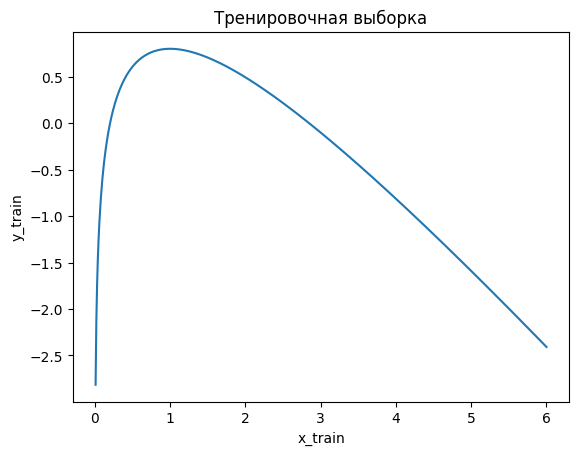

In [426]:
plt.plot(x_train, y_train)
  
plt.xlabel('x_train')
plt.ylabel('y_train')

plt.title('Тренировочная выборка')

plt.show()

In [427]:
test_step = 0.01
test_shift = 0.5
x_test = np.arange(a - test_shift, b + test_shift + test_step, test_step)
print(f'x_test: {x_test} with len = {len(x_test)}')
y_test = np.array([f(xx) for xx in x_test])
print(f'y_test: {y_test} with len = {len(y_test)}')

x_test: [1.5  1.51 1.52 1.53 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63
 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77
 1.78 1.79 1.8  1.81 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91
 1.92 1.93 1.94 1.95 1.96 1.97 1.98 1.99 2.   2.01 2.02 2.03 2.04 2.05
 2.06 2.07 2.08 2.09 2.1  2.11 2.12 2.13 2.14 2.15 2.16 2.17 2.18 2.19
 2.2  2.21 2.22 2.23 2.24 2.25 2.26 2.27 2.28 2.29 2.3  2.31 2.32 2.33
 2.34 2.35 2.36 2.37 2.38 2.39 2.4  2.41 2.42 2.43 2.44 2.45 2.46 2.47
 2.48 2.49 2.5  2.51 2.52 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61
 2.62 2.63 2.64 2.65 2.66 2.67 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75
 2.76 2.77 2.78 2.79 2.8  2.81 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89
 2.9  2.91 2.92 2.93 2.94 2.95 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03
 3.04 3.05 3.06 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17
 3.18 3.19 3.2  3.21 3.22 3.23 3.24 3.25 3.26 3.27 3.28 3.29 3.3  3.31
 3.32 3.33 3.34 3.35 3.36 3.37 3.38 3.39 3.4  3.41 3.42 3.43 3.44 3.4

# Early Stopping

In [428]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.01, patience=10, verbose=1),
]

# 2 архитектура

In [429]:
model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(1,), name="hidden_dense_1"),
        Dense(32, activation="tanh", name="hidden_dense_2"),
        Dense(16, activation="relu", name="hidden_dense_3"),
        Dense(8, activation="tanh", name="hidden_dense_4"),
        Dense(1, activation='linear', name="output"),
    ]
)

opt = opts.RMSprop(
    learning_rate=0.01
)

model.compile(loss='log_cosh', optimizer=opt, metrics=['accuracy'])

In [430]:
%%time
history = model.fit(x_train, y_train, epochs=EPOCHS, callbacks=callbacks)

Epoch 1/200
 7/19 [==========>...................] - ETA: 0s - loss: 0.3633 - accuracy: 0.0000e+00

/home/mrx/.local/share/virtualenvs/lab5-K_zs3c-F/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


19/19 [==============================] - 0s 19ms/step - loss: 0.2654 - accuracy: 0.0000e+00
Epoch 2/200
19/19 [==============================] - 0s 19ms/step - loss: 0.1065 - accuracy: 0.0000e+00
Epoch 3/200
19/19 [==============================] - 0s 20ms/step - loss: 0.0801 - accuracy: 0.0000e+00
Epoch 4/200
19/19 [==============================] - 0s 20ms/step - loss: 0.0738 - accuracy: 0.0000e+00
Epoch 5/200
19/19 [==============================] - 0s 19ms/step - loss: 0.0724 - accuracy: 0.0000e+00
Epoch 6/200
19/19 [==============================] - 0s 19ms/step - loss: 0.0486 - accuracy: 0.0000e+00
Epoch 7/200
19/19 [==============================] - 0s 19ms/step - loss: 0.0500 - accuracy: 0.0000e+00
Epoch 8/200
19/19 [==============================] - 0s 19ms/step - loss: 0.0561 - accuracy: 0.0000e+00
Epoch 9/200
19/19 [==============================] - 0s 21ms/step - loss: 0.0388 - accuracy: 0.0000e+00
Epoch 10/200
19/19 [==============================] - 0s 20ms/step - loss: 0

In [431]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_dense_1 (Dense)      (None, 64)                128       
                                                                 
 hidden_dense_2 (Dense)      (None, 32)                2080      
                                                                 
 hidden_dense_3 (Dense)      (None, 16)                528       
                                                                 
 hidden_dense_4 (Dense)      (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


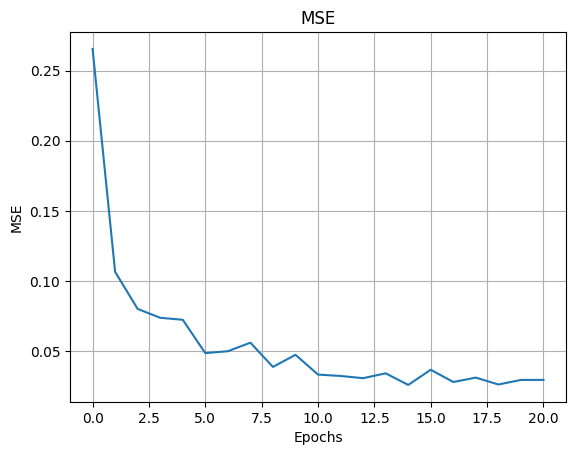

In [432]:
plt.plot(history.history['loss'])
plt.grid(True)

plt.xlabel('Epochs')
plt.ylabel('MSE')

plt.title('MSE')

plt.show()

In [433]:
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

7/7 [==============================] - 0s 3ms/step
0.0008603087107852483


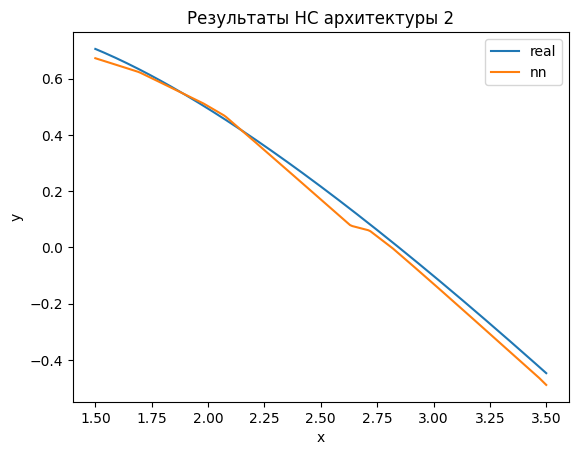

In [434]:
plt.plot(x_test, y_test, label='real')
plt.plot(x_test, y_pred, label='nn')

plt.xlabel('x')
plt.ylabel('y')

plt.title('Результаты НС архитектуры 2')

plt.legend()
plt.show()